# Lab One : Visualization and Data Preprocessing

Members:

Apurv Mittal
Seemant Srivastava
Ravi Sivaraman
Tai Chowdhury


## 1. Business Understanding

We have acquired the Australian Weather dataset from Kaggle portal. It contains 10 years of weather data collected from many locations across Australia. These are daily weather observations. There are 145,459 observations with 23 attributes. These attributes describes temperatures, wind, cloud, pressure, and humidity conditions both. There numeric data are broken down into morning (am) and afternoon (pm). 

This dataset can be useful for scientific weather reporting and analysis projects for the respective country's regions. These projects can provide solutions to weather prediction problems. For our project, we have chosen RainTomorrow (categorical) and Rainfall (continuous) as predictor variables. `RainTomorrow` is a categorical attribute which indicates whether it is going to rain tomorrow - yes or no. `Rainfall` is a continuous attribute that measures amount of rainfall each of the particular locations have received (in mm). Using our models, we will be able to design an algorithm where the beureu can help to predict rainfall for different regions in Australia.

Source: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

## 2. Data Meaning Type

## 3. Data Quality

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import math

In [2]:
df = pd.read_csv("weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [53]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MinTemp,140787.0,12.184827,6.393316,-8.5,7.600000,12.000000,16.800000,33.9
MaxTemp,140787.0,23.235480,7.107197,-4.8,17.900000,22.600000,28.200000,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.000000,0.000000,0.800000,371.0
Evaporation,140787.0,5.463856,3.227628,0.0,3.877320,5.800000,6.032209,145.0
Sunshine,140787.0,7.643002,3.025147,0.0,5.400000,8.890686,8.890686,14.5
WindGustSpeed,140787.0,39.996073,13.163395,6.0,31.000000,37.821107,46.000000,135.0
WindSpeed9am,140787.0,13.990524,8.853335,0.0,7.000000,13.000000,19.000000,130.0
WindSpeed3pm,140787.0,18.632732,8.719576,0.0,13.000000,19.000000,24.000000,87.0
Humidity9am,140787.0,68.842614,18.980993,0.0,57.000000,70.000000,83.000000,100.0
Humidity3pm,140787.0,51.478455,20.626939,0.0,37.000000,52.000000,65.000000,100.0


In [6]:
df.dtypes.value_counts()

float64    16
object      7
dtype: int64

In [7]:
# Check for duplicates
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
len(df)

145460

In [10]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=True)

Date              0.000000
Location          0.000000
MaxTemp           0.866905
MinTemp           1.020899
Temp9am           1.214767
WindSpeed9am      1.214767
Humidity9am       1.824557
WindSpeed3pm      2.105046
Rainfall          2.241853
RainToday         2.241853
RainTomorrow      2.245978
Temp3pm           2.481094
WindDir3pm        2.906641
Humidity3pm       3.098446
WindGustSpeed     7.055548
WindGustDir       7.098859
WindDir9am        7.263853
Pressure3pm      10.331363
Pressure9am      10.356799
Cloud9am         38.421559
Cloud3pm         40.807095
Evaporation      43.166506
Sunshine         48.009762
dtype: float64

In [11]:
# Removing records which are blank for Rain today and Rain tomorrow

df.dropna(subset = ["RainToday"], inplace=True)
df.dropna(subset = ["RainTomorrow"], inplace=True)

# REFERENCE: https://www.kite.com/python/answers/how-to-drop-empty-rows-from-a-pandas-dataframe-in-python

In [12]:
# Check the null values again
(df.isnull().sum()/len(df)*100).sort_values(ascending=True)

Date              0.000000
RainToday         0.000000
Rainfall          0.000000
RainTomorrow      0.000000
Location          0.000000
MaxTemp           0.218060
MinTemp           0.332417
Temp9am           0.465952
WindSpeed9am      0.749359
Humidity9am       1.077514
WindSpeed3pm      1.797751
Temp3pm           1.863808
Humidity3pm       2.486735
WindDir3pm        2.606775
WindGustSpeed     6.467216
WindGustDir       6.508413
WindDir9am        6.861429
Pressure9am       9.761555
Pressure3pm       9.780022
Cloud9am         37.379161
Cloud3pm         39.843167
Evaporation      42.400222
Sunshine         47.451114
dtype: float64

##### REFERENCE: https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd

In [13]:
df_num = df.columns[df.dtypes == 'float64']
df_cat=df.columns[df.dtypes == 'object']
print("Numeric Variables:", df_num)
print("Categorical Variables:", df_cat)


Numeric Variables: Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')
Categorical Variables: Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [14]:
df[df_num].groupby([df['RainToday'],df['RainTomorrow']]).mean()

MinTemp    MaxTemp   Rainfall  Evaporation  \
RainToday RainTomorrow                                                 
No        No            11.818967  24.422043   0.063760     6.032209   
          Yes           12.956982  22.360206   0.139003     5.088293   
Yes       No            12.324060  20.642048   7.906851     4.081266   
          Yes           13.469845  19.688553  12.970597     3.877320   

                        Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
RainToday RainTomorrow                                                        
No        No            8.890686      37.821107     13.317527     18.022658   
          Yes           5.062517      44.669880     14.539171     19.550031   
Yes       No            6.678808      40.884074     14.924111     19.339026   
          Yes           3.765870      47.470654     16.563479     20.649129   

                        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
RainToday RainTomorrow                                                       
No        No              64.082293    44.362724  1018.954556  1016.230809   
          Yes             71.589227    63.305238  1015.153728  1012.459066   
Yes       No              77.932642    58.221810  1016.621577  1015.476598   
          Yes             85.460455    75.440652  1013.446272  1012.015427   

                        Cloud9am  Cloud3pm    Temp9am    Temp3pm  
RainToday RainTomorrow                                            
No        No            3.635105  3.684394  17.334427  22.974297  
          Yes           5.562970  6.138312  17.260482  20.276654  
Yes       No            5.436373  5.118582  15.647827  19.267326  
          Yes           6.681342  6.624841  16.010420  17.930996

##### REFERENCE: https://stackoverflow.com/questions/43321455/pandas-count-null-values-in-a-groupby-function/43322220

In [15]:
# Number of null for Evaporation by the RainToday And Rain Tomorrow
df_E = df.Evaporation.isnull().groupby([df['RainToday'],df['RainTomorrow']]).sum()
df_E_mean = df.Evaporation.groupby([df['RainToday'],df['RainTomorrow']]).mean()
print('Number of Nulls in Evaporation grouped by Rain Today and Tomorrow:\n',df_E)
print('\nMean of Evaporation grouped by Rain Today and Tomorrow:\n',df_E_mean)

print('\nOverall Mean of Evaporation:\n',df.Evaporation.mean())

Number of Nulls in Evaporation grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              38964
           Yes              7071
Yes        No               7250
           Yes              6409
Name: Evaporation, dtype: int64

Mean of Evaporation grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              6.032209
           Yes             5.088293
Yes        No              4.081266
           Yes             3.877320
Name: Evaporation, dtype: float64

Overall Mean of Evaporation:
 5.472515506887154


In [16]:
# Number of null for Sunshine by the RainToday And Rain Tomorrow
df_S = df.Sunshine.isnull().groupby([df['RainToday'],df['RainTomorrow']]).sum()
df_S_mean = df.Sunshine.groupby([df['RainToday'],df['RainTomorrow']]).mean()
print('Number of Nulls in Sunshine grouped by Rain Today and Tomorrow:\n',df_S, '\n')
print('\nMean of Sunshine grouped by Rain Today and Tomorrow:\n',df_S_mean)
print('\nOverall Mean of Sunshine:\n',df.Sunshine.mean())

Number of Nulls in Sunshine grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              44198
           Yes              7848
Yes        No               7982
           Yes              6777
Name: Sunshine, dtype: int64 


Mean of Sunshine grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              8.890686
           Yes             5.062517
Yes        No              6.678808
           Yes             3.765870
Name: Sunshine, dtype: float64

Overall Mean of Sunshine:
 7.630539861047281


In [17]:
# Number of null for Cloud 3 PM by the RainToday And Rain Tomorrow
df_C3 = df.Cloud3pm.isnull().groupby([df['RainToday'],df['RainTomorrow']]).sum()
df_C3_mean = df.Cloud3pm.groupby([df['RainToday'],df['RainTomorrow']]).mean()
print('Number of Nulls in Cloud at 3 PM grouped by Rain Today and Tomorrow:\n',df_C3, '\n')
print('\nMean of Cloud at 3 PM grouped by Rain Today and Tomorrow:\n',df_C3_mean)
print('\nOverall Mean of Cloud at 3 PM:\n',df.Cloud3pm.mean())

Number of Nulls in Cloud at 3 PM grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              38705
           Yes              6012
Yes        No               6224
           Yes              5153
Name: Cloud3pm, dtype: int64 


Mean of Cloud at 3 PM grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              3.684394
           Yes             6.138312
Yes        No              5.118582
           Yes             6.624841
Name: Cloud3pm, dtype: float64

Overall Mean of Cloud at 3 PM:
 4.499250233195188


In [18]:
# Number of null for Cloud 9 AM by the RainToday And Rain Tomorrow
df_C9 = df.Cloud9am.isnull().groupby([df['RainToday'],df['RainTomorrow']]).sum()
df_C9_mean = df.Cloud9am.groupby([df['RainToday'],df['RainTomorrow']]).mean()
print('Number of Nulls in Cloud at 9 AM grouped by Rain Today and Tomorrow:\n',df_C9, '\n')
print('\nMean of Cloud at 9 AM  grouped by Rain Today and Tomorrow:\n',df_C9_mean)
print('\nOverall Mean of Cloud at 9 AM:\n',df.Cloud9am.mean())

Number of Nulls in Cloud at 9 AM grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              36046
           Yes              5964
Yes        No               5762
           Yes              4853
Name: Cloud9am, dtype: int64 


Mean of Cloud at 9 AM  grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              3.635105
           Yes             5.562970
Yes        No              5.436373
           Yes             6.681342
Name: Cloud9am, dtype: float64

Overall Mean of Cloud at 9 AM:
 4.431160817585808


In [19]:
df_impute = df
mat_yesno = df[df_num].groupby([df['RainToday'],df['RainTomorrow']]).mean()
RAINTODAY=0
RAINTOMORROW=1
COUNTER = 0
NO_NO = 0
for i in range(2):
    for j in range(2):
        for indexattr in mat_yesno.iloc[NO_NO].index:
            df_impute.loc[(df_impute["RainToday"] == mat_yesno.iloc[COUNTER].name[RAINTODAY] ) & (df_impute["RainTomorrow"] == mat_yesno.iloc[COUNTER].name[RAINTOMORROW]) & (df_impute[indexattr].isnull()), indexattr] = mat_yesno.iloc[COUNTER][indexattr]
        COUNTER = COUNTER + 1

        
        
#Filling the missing values for categorical variables with mode
df_impute['WindDir9am'] = df_impute['WindDir9am'].fillna(df_impute['WindDir9am'].mode()[0])
df_impute['WindGustDir'] = df_impute['WindGustDir'].fillna(df_impute['WindGustDir'].mode()[0])
df_impute['WindDir3pm'] = df_impute['WindDir3pm'].fillna(df_impute['WindDir3pm'].mode()[0])

In [20]:
(df_impute.isnull().sum()/len(df)*100).sort_values(ascending=True)

Date             0.0
Temp3pm          0.0
Temp9am          0.0
Cloud3pm         0.0
Cloud9am         0.0
Pressure3pm      0.0
Pressure9am      0.0
Humidity3pm      0.0
Humidity9am      0.0
WindSpeed3pm     0.0
RainToday        0.0
WindSpeed9am     0.0
WindDir9am       0.0
WindGustSpeed    0.0
WindGustDir      0.0
Sunshine         0.0
Evaporation      0.0
Rainfall         0.0
MaxTemp          0.0
MinTemp          0.0
Location         0.0
WindDir3pm       0.0
RainTomorrow     0.0
dtype: float64

## 4. Visualization

<AxesSubplot:xlabel='Evaporation', ylabel='Sunshine'>

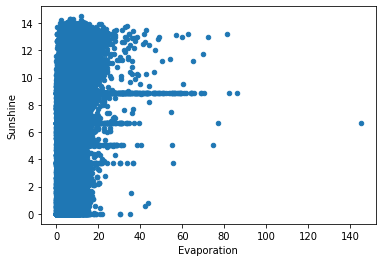

In [21]:
df_impute.plot.scatter("Evaporation", "Sunshine")

<AxesSubplot:xlabel='Evaporation', ylabel='MaxTemp'>

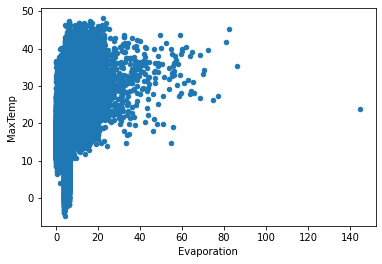

In [22]:
df_impute.plot.scatter("Evaporation", "MaxTemp")

<AxesSubplot:xlabel='Sunshine', ylabel='MaxTemp'>

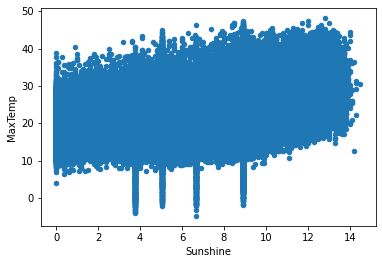

In [23]:
df_impute.plot.scatter("Sunshine", "MaxTemp")

<AxesSubplot:xlabel='Evaporation', ylabel='Cloud9am'>

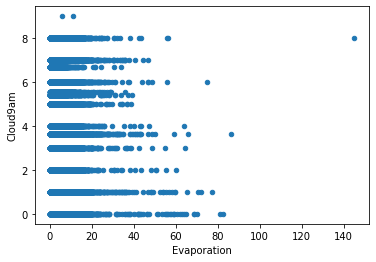

In [24]:
df_impute.plot.scatter("Evaporation", "Cloud9am")

(0.0, 38710.0)

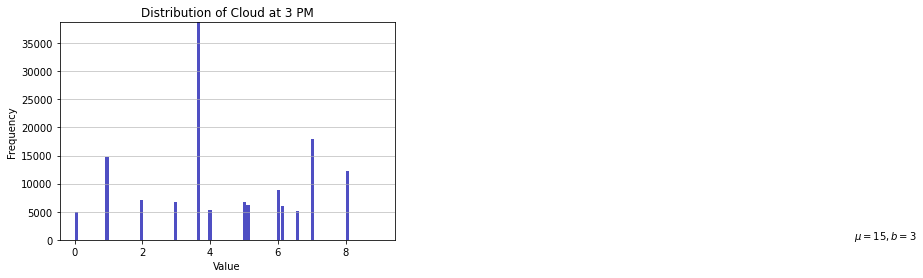

In [25]:

n, bins, patches = plt.hist(x=df_impute.Cloud3pm, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Cloud at 3 PM')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

# Reference: https://realpython.com/python-histograms/

(0.0, 3240.0)

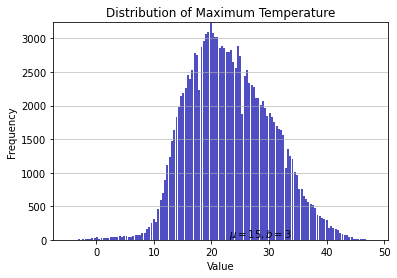

In [26]:

n, bins, patches = plt.hist(x=df_impute.MaxTemp, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum Temperature')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

<AxesSubplot:xlabel='MinTemp', ylabel='Count'>

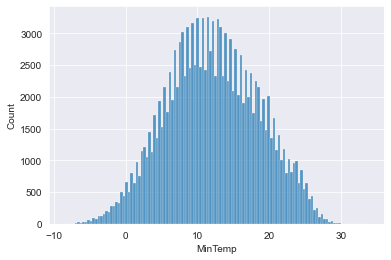

In [27]:
sns.set_style('darkgrid')
sns.histplot(df_impute.MinTemp)

<AxesSubplot:xlabel='WindSpeed9am', ylabel='WindSpeed3pm'>

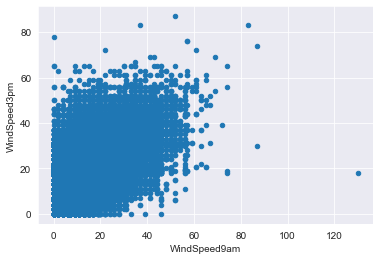

In [28]:
df_impute.plot.scatter("WindSpeed9am", "WindSpeed3pm")

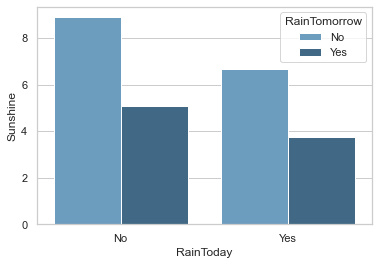

In [29]:
from numpy import median
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="RainToday", y="Sunshine", hue="RainTomorrow", data=df_impute, estimator=median,  palette="Blues_d")

# Reference: https://seaborn.pydata.org/generated/seaborn.barplot.html

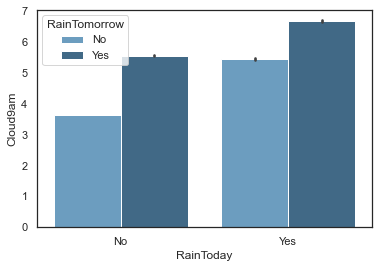

In [30]:
sns.set_theme(style="white")
ax = sns.barplot(x="RainToday", y="Cloud9am", hue="RainTomorrow", data=df_impute,  palette="Blues_d")

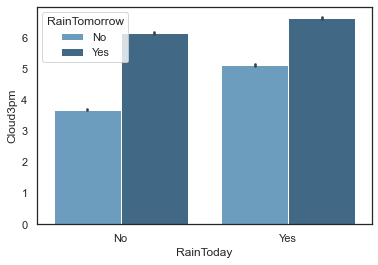

In [31]:
sns.set_theme(style="white")
ax = sns.barplot(x="RainToday", y="Cloud3pm", hue="RainTomorrow", data=df_impute,  palette="Blues_d")

## 5. Explore Joint Attributes

#### Correlation Matrix: 

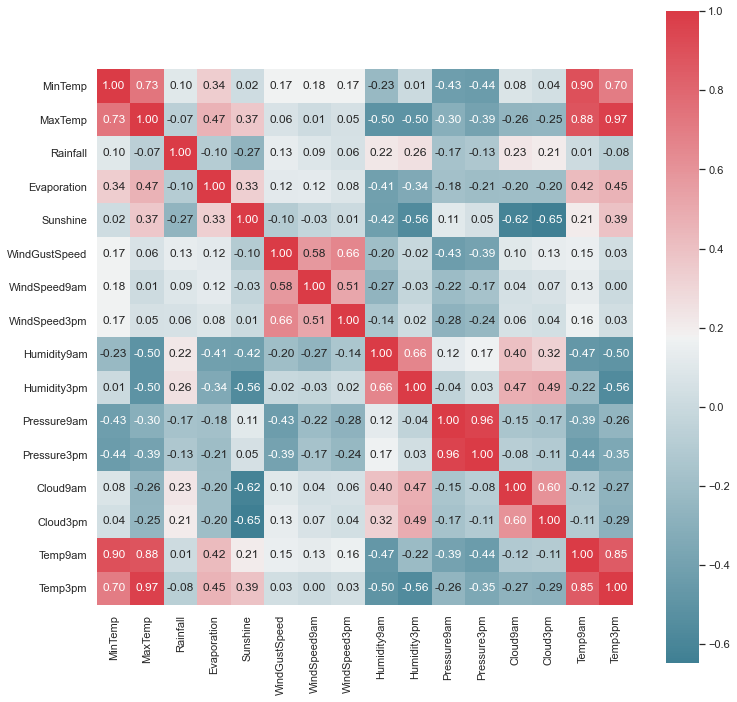

In [56]:
#HeatMap for plot on the correlation matrix using seaborn
plt.figure(figsize=(12,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
ax = sns.heatmap(df_impute.corr(), cmap=cmap, square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In this correlation matrix, we notice some strong to mid positive correlations. There are some negative correlations but those are not significant (i.e. Cloud vs pressure). The strongest correlations we notice are in temperature attributes - min vs max temperature, am vs pm temperature, and am vs pm cloud attributes. Other than those attrubutes, here are some of the other pairs of positive correlations we notice between attributes:
evaporation and sunshine, Windspeed 9am vs Windspeed 3pm, and himidity vs cloud (am/pm).  

/Users/apurv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


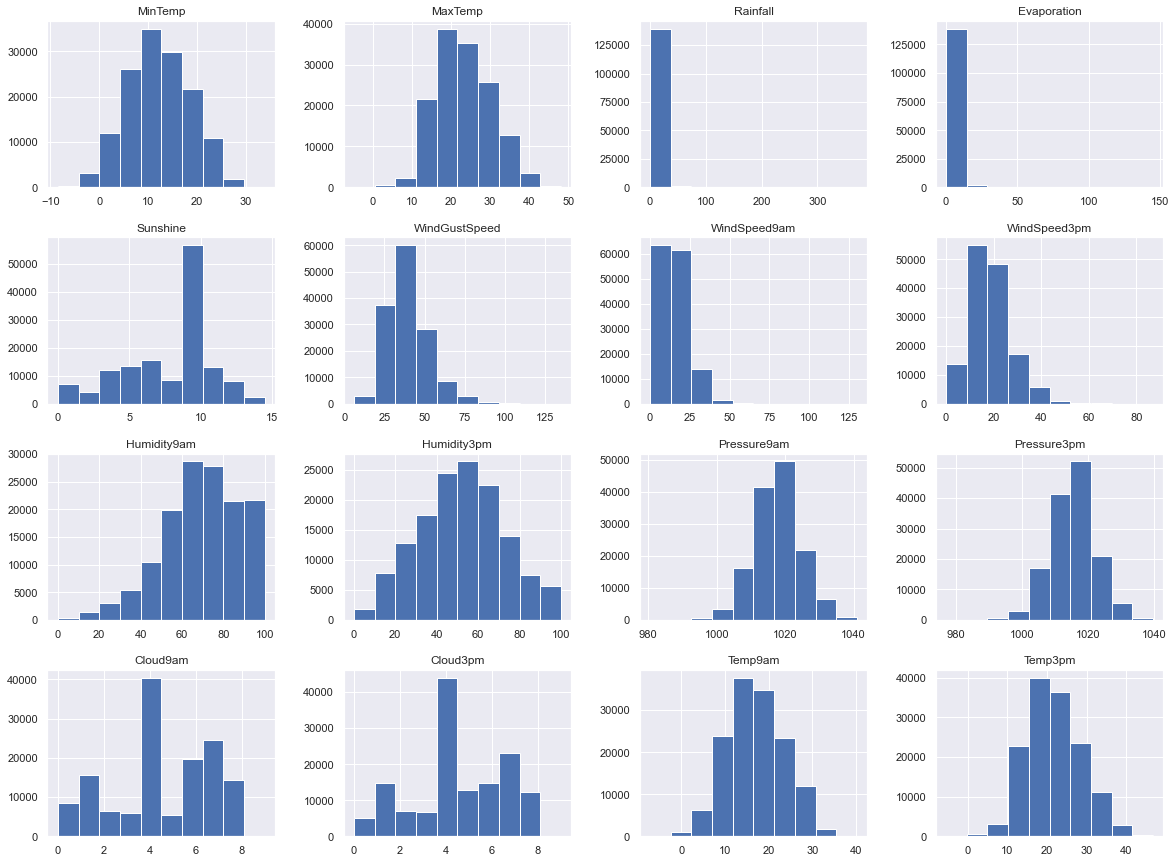

In [57]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df_impute.hist(ax=ax)
plt.show()

#### Cross-Tabulation:

In [33]:
# RainToday By State (first one) and RainTomorrow by State (second one)
df3 = pd.merge(df_impute, df2, on = 'WindGustDir')
Location_Windir_RainToday = pd.crosstab(df3['State'], df3['RainToday'])
Location_Windir_RainToday.div(Location_Windir_RainToday.sum(1),axis=0).plot.barh(stacked = True)

Location_Windir_Raintomorrow = pd.crosstab(df3['State'], df3['RainTomorrow'])
Location_Windir_Raintomorrow.div(Location_Windir_Raintomorrow.sum(1),axis=0).plot.barh(stacked = True)

NameError: name 'df2' is not defined

Explain

In [ ]:
# WindDir By State
df3 = pd.merge(df_impute, df2, on = 'WindGustDir')
Location_Windir = pd.crosstab(df3['State'], df3['WindDir_main'])
Location_Windir.div(Location_Windir.sum(1),axis=0).plot.barh(stacked = True)


Explain

In [ ]:
groupby_single = df_impute.groupby(['State']).agg({'Rainfall': ['mean', 'min', 'max']})
groupby_single

In [ ]:
Explain

## 6.Explore Attributes and Class

In [ ]:
df_impute2 = df_impute

df_impute2['AvgTemp'] = df_impute2[['MinTemp', 'MaxTemp']].mean(axis=1)

#Rainfall Vs Different Temperature Attributes

# Line plot for the effect of wind direction on rainfall 
WINdIR = ['E','ENE', 'NE', 'NNE', 'N', 'NNW', 'NW', 'WNW', 'W', 'WSW', 'SW', 'SSW', 'S', 'SSE', 'SE', 'ESE']

import plotly.graph_objs as go
fig = go.Figure()

fig.add_trace(go.Scatter(y=df_impute2.groupby('MinTemp')['Rainfall'].mean(),
                         x=WINdIR,
                         name = 'Minimum Temperature',
                         line_width=5.0,
                         )
             )
fig.add_trace(go.Scatter(y=df_impute2.groupby('MaxTemp')['Rainfall'].mean(),
                         x=WINdIR,
                         name = 'Maximum Temperature',
                         line_width=5.0,
                        )
             )
fig.add_trace(go.Scatter(y=df_impute2.groupby('AvgTemp')['Rainfall'].mean(),
                         x=WINdIR,
                         name = 'Average Temperature',
                         line_width=5.0,
                         )
             )

fig.update_layout(title='Rainfall vs Min/Max/Avg Temperature',
                  xaxis_title='Temperature [celsius]',
                  yaxis_title='Rainfall [mm]',
                  titlefont={'size': 28, 'family':'Serif'},
                  showlegend=True,
                  paper_bgcolor='lightgray',
                  plot_bgcolor='#999999',
                  width=750, height=500,
                 )
fig.show()

# Reference: https://www.kaggle.com/desalegngeb/plotly-guide-customize-for-better-visualizations

Explain

In [ ]:
# Radar plot for differet temperature types on rainfall 
state = ['Australian Capital Territory','New South Wales', 'Northern Territory', 'Queensland', 'South Australia', 
          'Tasmania', 'Victoria', 'Western Australia']

import plotly.graph_objs as go
fig = go.Figure()

fig.add_trace(go.Barpolar(r=df_impute2.groupby('MinTemp')['Rainfall'].mean(),
                          theta=state,
                          name='Minimum Temperature'
                          )
             )
fig.add_trace(go.Barpolar(r=df_impute2.groupby('MaxTemp')['Rainfall'].mean(),
                          theta=state,
                          name='Maximum Temperature'
                          )
             )
fig.add_trace(go.Barpolar(r=df_impute2.groupby('AvgTemp')['Rainfall'].mean(),
                          theta=state,
                          name='Average Temperature'
                          )
             )

fig.update_layout(polar=dict(radialaxis=dict(visible=False,
                                             )
                             ),
                  showlegend=True,
                  title='Rainfall vs Temperature',
                  titlefont={'size': 28, 'family':'Serif'},
                  template='plotly_dark',
                  paper_bgcolor='gray',
                  width=600, height=500,
                 )
fig.show()


# Reference: https://www.kaggle.com/desalegngeb/plotly-guide-customize-for-better-visualizations

Explain

In [ ]:
#Rainfall Vs Other Continuous Attributes 

sns.pairplot(df_impute[['Rainfall','Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
                       'Pressure9am', 'Pressure3pm']])

Explain

## 7.New Features

## 8. Exceptional Work

In [ ]:
df_impute_num = df.columns[df.dtypes == 'float64']
df_impute_cat=df.columns[df.dtypes == 'object']
print("Numeric Variables:", df_num)
print("Categorical Variables:", df_cat)

In [59]:
X=df_impute[df_num]
y = df.RainTomorrow

In [60]:
print('features shape:', X.shape) 
print('target shape:', y.shape )

features shape: (140787, 16)
target shape: (140787,)


Cumulative Explained variance of components: 1.0000000000000002
PCA(n_components=16)


PCA(n_components=16)

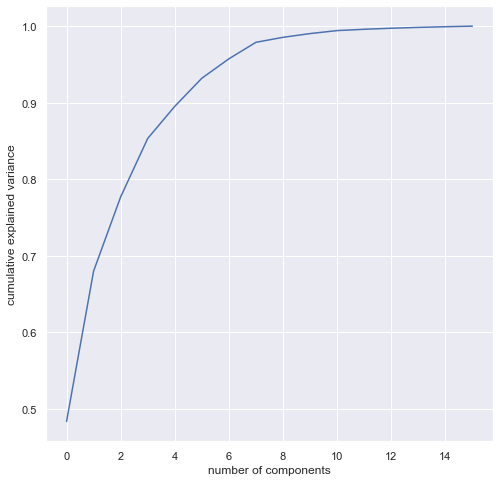

In [71]:
from sklearn.decomposition import PCA
pca = None
def plot_pca(X):
    # Perform PCA on the data to reduce the number of initial features 
     
    pca = PCA(n_components=X.shape[1])
    pca.fit(X)
    # Inspect the explained variances to determine how many components to use  
    plt.subplots(figsize=(8, 8))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    print('Cumulative Explained variance of components:',sum(pca.explained_variance_ratio_[0:199]) )
    print(pca)
    
    components = pca.fit_transform(X)
    total_var = pca.explained_variance_ratio_.sum() * 100
    n_components = 8

    return pca
    
pca = plot_pca(X)
pca



# https://github.com/jakemdrew/DataMiningNotebooks/blob/master/03.%20Dimension%20Reduction.ipynb

In [72]:
pca.components_

array([[ 5.33809364e-02,  1.69116782e-01, -8.34513159e-02,
         5.43869628e-02,  6.12740393e-02,  8.68639903e-02,
         6.50538010e-02,  3.93382812e-02, -6.38111403e-01,
        -6.97706041e-01, -2.81788699e-02, -4.58851306e-02,
        -4.16269420e-02, -3.63550028e-02,  1.13590044e-01,
         1.69446170e-01],
       [ 1.45991485e-01,  3.56791133e-02,  1.26410599e-01,
         2.09530233e-02, -4.04737028e-02,  6.75822881e-01,
         3.46619888e-01,  3.68494332e-01, -1.61625069e-01,
         3.28801470e-01, -2.32373490e-01, -2.05994700e-01,
         3.14656284e-02,  3.42970486e-02,  1.17216834e-01,
         1.07808825e-02],
       [-4.09164997e-01, -3.75675172e-01, -8.71461134e-02,
        -6.20986135e-02,  5.22810630e-03,  3.32117533e-01,
         1.95279946e-01,  1.81452720e-01,  1.11882107e-01,
        -3.20691221e-01,  2.11815399e-01,  2.33370377e-01,
        -1.25421554e-02, -1.25309866e-02, -4.09712948e-01,
        -3.40214285e-01],
       [ 8.47182379e-02,  1.91568132e

In [63]:
import plotly.express as px

components = pca.fit_transform(X)
total_var = pca.explained_variance_ratio_.sum() * 100
n_components = 4

fig = px.scatter_matrix(
    components,
    color=hotel_nol.is_canceled,
    dimensions=range(n_components),
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.show()

AttributeError: 'NoneType' object has no attribute 'fit_transform'

In [34]:
#Read the Government data for State and Latitude/Longitude lookup to create a geography dataframe for Weather Australia
worldcities = pd.read_excel("/Users/apurv/OneDrive - Southern Methodist University/SMU/7331 - Machine Learning 1/ML - Lab 1/Data set/worldcities.xlsx", sheet_name='Sheet1', header=[0])
worldcities = worldcities[(worldcities.country == "Australia")]
worldcities.rename(columns={'city': 'Location', 'lat': 'Latitude', 'lng': 'Longitude', 'admin_name': 'State'}, inplace=True)
worldcities = worldcities.drop(['city_ascii','country','iso2','iso3','capital','population','id'],axis=1)
df_impute_temp = df_impute
df_geo = pd.merge(df_impute_temp, worldcities, how="left", on=["Location"])
df_geo.head()


# Reference for World Cities data : https://simplemaps.com/data/world-cities

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Latitude,Longitude,State
0,2008-12-01,Albury,13.4,22.9,0.6,6.032209,8.890686,W,44.0,W,...,1007.1,8.000000,3.684394,16.9,21.8,No,No,-36.0806,146.9158,New South Wales
1,2008-12-02,Albury,7.4,25.1,0.0,6.032209,8.890686,WNW,44.0,NNW,...,1007.8,3.635105,3.684394,17.2,24.3,No,No,-36.0806,146.9158,New South Wales
2,2008-12-03,Albury,12.9,25.7,0.0,6.032209,8.890686,WSW,46.0,W,...,1008.7,3.635105,2.000000,21.0,23.2,No,No,-36.0806,146.9158,New South Wales
3,2008-12-04,Albury,9.2,28.0,0.0,6.032209,8.890686,NE,24.0,SE,...,1012.8,3.635105,3.684394,18.1,26.5,No,No,-36.0806,146.9158,New South Wales
4,2008-12-05,Albury,17.5,32.3,1.0,6.032209,8.890686,W,41.0,ENE,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,-36.0806,146.9158,New South Wales


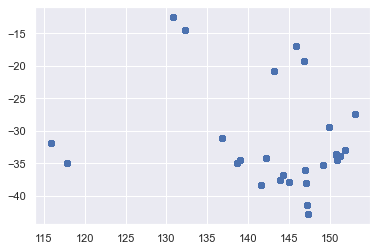

In [36]:
import matplotlib.pyplot as plt
plt.scatter(x=df_geo['Longitude'], y=df_geo['Latitude'])
plt.show()

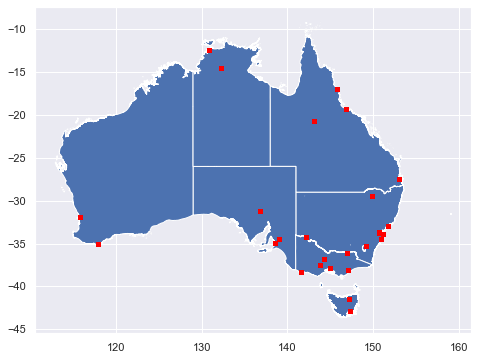

In [50]:
#import pandas as pd
# pip install shapely
# pip install geopandas
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
aus = gpd.read_file("aust_cd66states.shp", SHAPE_RESTORE_SHX = 'YES')
geometry = [Point(xy) for xy in zip(df_geo['Longitude'], df_geo['Latitude'])]
gdf = GeoDataFrame(df_geo, geometry=geometry)
#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=aus.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

# Reference for Australia shape file: http://data.daff.gov.au/anrdl/metadata_files/pa_nsaasr9nnd_02211a04.xml

In [51]:
from mpl_toolkits.basemap import Basemap #conda install basemap
#import matplotlib.pyplot as plt
#import numpy as np
#import pandas as pd
fig = plt.figure(figsize=(12,9))
m = Basemap(projection='mill',
           llcrnrlat = -90,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           resolution = 'c')
m.drawcoastlines()
m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])
sites_lat_y = df_geo['Latitude'].tolist()
sites_lon_x = df_geo['Longitude'].tolist()
colors = ['green', 'darkblue', 'yellow', 'red', 'blue', 'orange']
m.scatter(sites_lon_x,sites_lat_y,latlon=True, s=500, c=colors, marker='o', alpha=1, edgecolor='k', linewidth=1)
plt.title('Basemap tutorial', fontsize=20)
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [58]:
import plotly.express as px

components = pca.fit_transform(X)
total_var = pca.explained_variance_ratio_.sum() * 100
n_components = 4

fig = px.scatter_matrix(
    components,
    color=hotel_nol.is_canceled,
    dimensions=range(n_components),
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.show()

NameError: name 'pca' is not defined